### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 6)

### Loading Preprocessed Data:

In [3]:
df_preprocessed = pd.read_csv('../data/processed_heart_disease.csv')


print("Loaded Preprocessed DataFrame shape:", df_preprocessed.shape)
print("\nFirst few row:")
print(df_preprocessed.head())
print("\nDataFrame info:")
print(df_preprocessed.info())
print("\nTarget value counts:")
print(df_preprocessed['target'].value_counts())


X_full = df_preprocessed.drop('target', axis=1)
y = df_preprocessed['target']

print(f"\nSeperated Features (X_full) shape: {X_full.shape}")
print(f"Seperated Target (y) shape: {y.shape}")
print("\nFirst few rows of features (X_full)")
print(X_full.head())
print("\nFirst few values of target: (y):")
print(y.head())


try: 
    X_selected = pd.read_csv('../data/X_selected_features.csv')
    print(f"\nLoaded feature-selected data: {X_selected.shape}")
except FileNotFoundError:
    X_selected = X_full
    print("\nFeature-selected data file not found. Using ALL preprocessed features.")
    
print(f"\n--- Final Data for Modeling ---")
print(f"Features (X_selected) shape: {X_selected.shape}")
print(f"Target (y) shape: {y.shape}")
if X_selected.shape[1] != X_full.shape[1]:
    print(f"Using a subset of {X_selected.shape[1]} features.")
else:
    print("Using all preprocessed features.")

Loaded Preprocessed DataFrame shape: (920, 14)

First few row:
    age  sex  cp  trestbps   chol  ...  oldpeak  slope   ca  thal  target
0  63.0    1   1     145.0  233.0  ...      2.3    3.0  0.0   6.0       0
1  67.0    1   4     160.0  286.0  ...      1.5    2.0  3.0   3.0       1
2  67.0    1   4     120.0  229.0  ...      2.6    2.0  2.0   7.0       1
3  37.0    1   3     130.0  250.0  ...      3.5    3.0  0.0   3.0       0
4  41.0    0   2     130.0  204.0  ...      1.4    1.0  0.0   3.0       0

[5 rows x 14 columns]

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    float64
 6   restecg   920 non-null    float

### Splitting Data into Training and Testing Sets:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set features shape:", X_train.shape)
print("Training set target shape:", y_train.shape)
print("Testing set features shape:", X_test.shape)
print("Testing set target shape:", y_test.shape)

print("\nTraining set target distribution:")
print(y_train.value_counts())
print("\nTesting set target distribution:")
print(y_test.value_counts())

Training set features shape: (736, 10)
Training set target shape: (736,)
Testing set features shape: (184, 10)
Testing set target shape: (184,)

Training set target distribution:
target
1    407
0    329
Name: count, dtype: int64

Testing set target distribution:
target
1    102
0     82
Name: count, dtype: int64


### Initializing and Training Models

In [7]:
models = {
    "Logistics Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True)
}


trained_models = {}

print("--- Training Models ---")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained successfully.")
print("--- Training Complete ---")

--- Training Models ---
Training Logistics Regression...
Logistics Regression trained successfully.
Training Decision Tree...
Decision Tree trained successfully.
Training Random Forest...
Random Forest trained successfully.
Training Support Vector Machine...
Support Vector Machine trained successfully.
--- Training Complete ---


### Evaluating Models:


--- Evaluating Models ---

--- Evaluating Logistics Regression ---
Accuracy: 0.8152
Precision: 0.8208
Recall: 0.8529
F1-Score: 0.8365
ROC AUC: 0.8973

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        82
           1       0.82      0.85      0.84       102

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.82      0.81       184



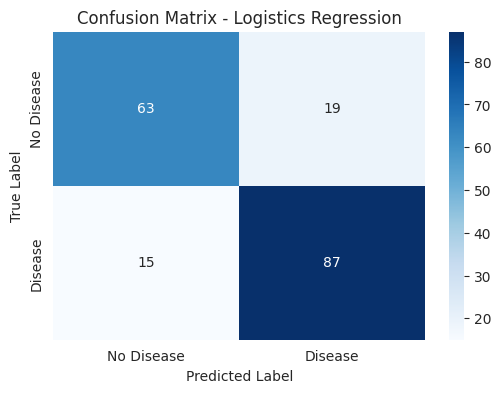

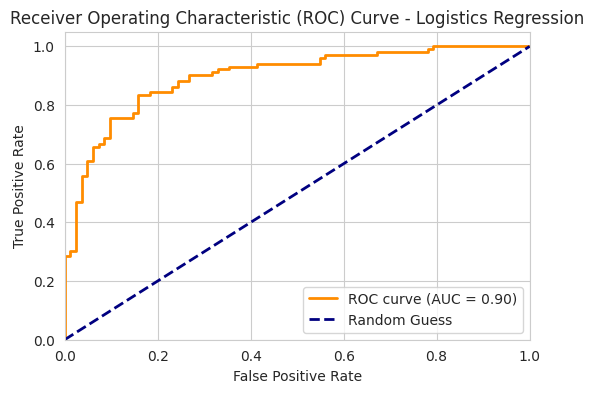


--- Evaluating Decision Tree ---
Accuracy: 0.7609
Precision: 0.7900
Recall: 0.7745
F1-Score: 0.7822
ROC AUC: 0.7592

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73        82
           1       0.79      0.77      0.78       102

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.76      0.76      0.76       184



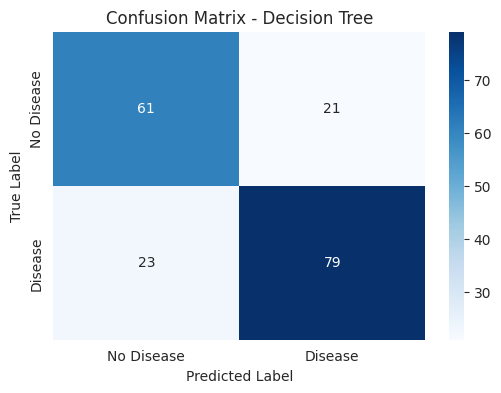

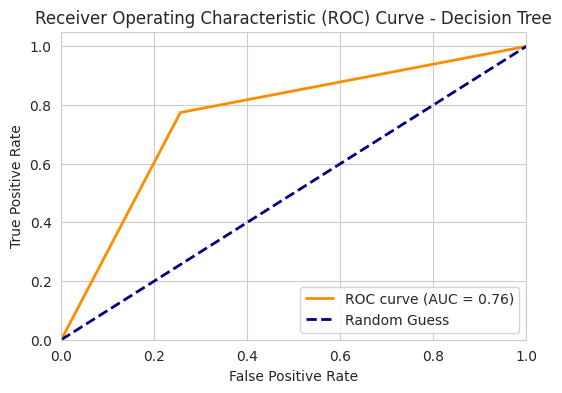


--- Evaluating Random Forest ---
Accuracy: 0.8261
Precision: 0.8302
Recall: 0.8627
F1-Score: 0.8462
ROC AUC: 0.9083

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        82
           1       0.83      0.86      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



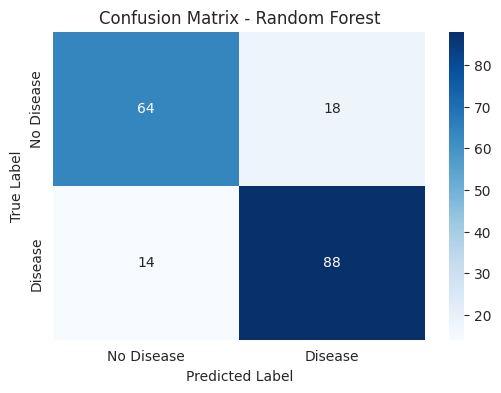

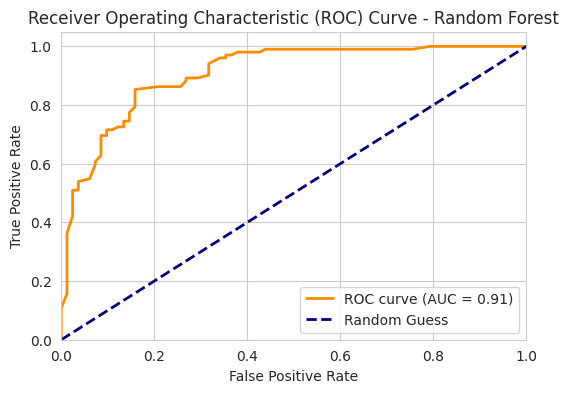


--- Evaluating Support Vector Machine ---
Accuracy: 0.7500
Precision: 0.7545
Recall: 0.8137
F1-Score: 0.7830
ROC AUC: 0.7786

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.71        82
           1       0.75      0.81      0.78       102

    accuracy                           0.75       184
   macro avg       0.75      0.74      0.74       184
weighted avg       0.75      0.75      0.75       184



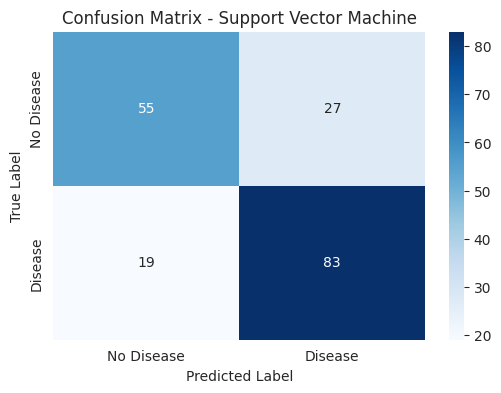

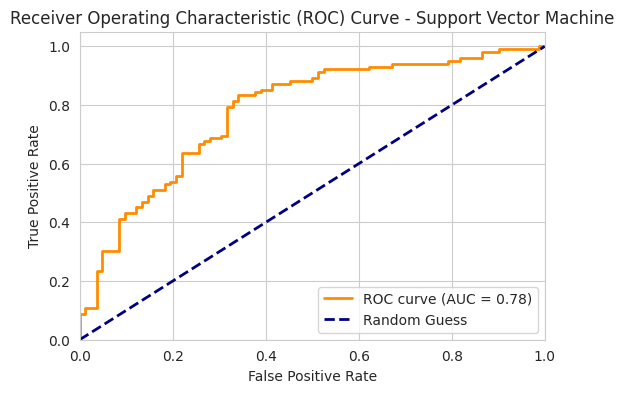

In [11]:
print("\n--- Evaluating Models ---")


model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

predictions = {}

for name, model in trained_models.items():
    print(f"\n--- Evaluating {name} ---")
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    predictions[name] = y_pred
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    try:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    except ValueError:
        roc_auc = np.nan
        print(f"Warning: Couldn't calculate ROC AUC for {name} (likely only one class in test set).")
        
    
    model_names.append(name)
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
   
   
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease']) 
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    
    if not np.isnan(roc_auc):
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, color="darkorange", lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--', label="Random Guess")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"Receiver Operating Characteristic (ROC) Curve - {name}")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()
    else:
        print("ROC Curve not plotted due to undefined ROC AUC.")
        print("\n--- Evulation Complete ---")
   

### Comparing Model Performance 


--- Model Performance Comparison ---
                 Model  Accuracy  Precision   Recall  F1-Score  ROC AUC
         Random Forest  0.826087   0.830189 0.862745  0.846154 0.908297
  Logistics Regression  0.815217   0.820755 0.852941  0.836538 0.897298
Support Vector Machine  0.750000   0.754545 0.813725  0.783019 0.778575
         Decision Tree  0.760870   0.790000 0.774510  0.782178 0.759206


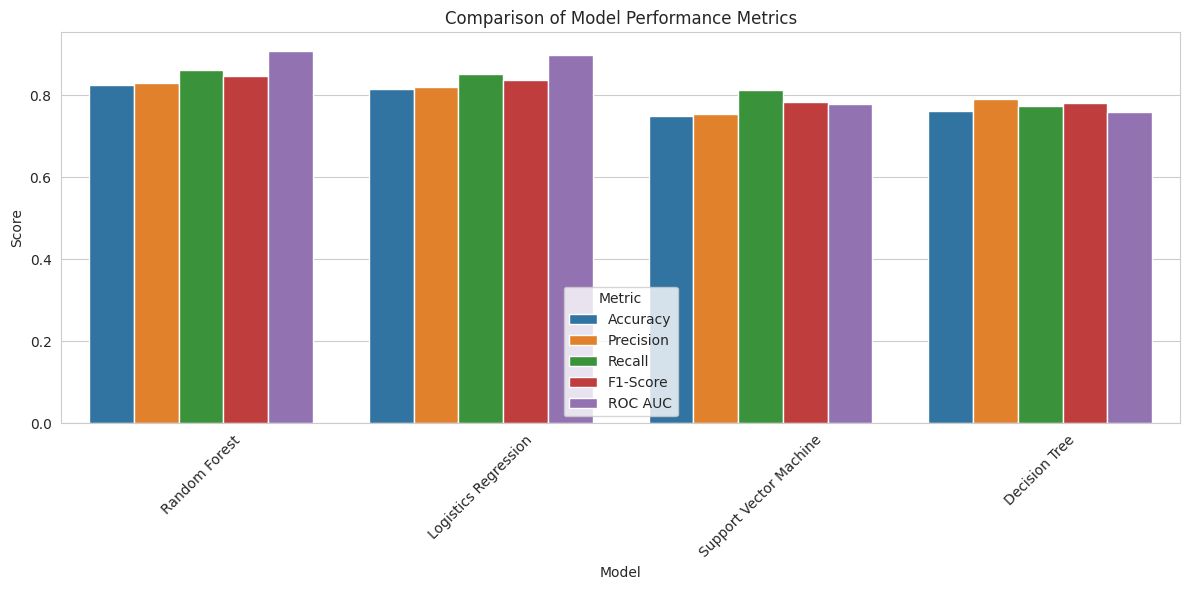

In [13]:
print("\n--- Model Performance Comparison ---")

results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores,
    'ROC AUC': roc_aucs
})

results_df = results_df.sort_values(by='F1-Score', ascending=False)

print(results_df.to_string(index=False))

results_melted = results_df.melt(id_vars=['Model'], var_name='Metric', value_name="Score")


plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted)
plt.title("Comparison of Model Performance Metrics")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

### Saving Results

In [14]:
results_df.to_csv('../results/evaluation_metrics.csv', index=False)
print("\nModel evaluation metrics saved to ../results/evaluation_metrics.csv")


Model evaluation metrics saved to ../results/evaluation_metrics.csv
